In [2]:
import pandas as pd
import numpy as np

In [3]:
import networkx as nx

In [4]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [5]:
import matplotlib.pyplot as plt

In [6]:
gsea = pd.read_csv('gsea_scores.csv', index_col=0)
gsea.shape

(1814, 18)

In [7]:
kirc_gsea = gsea[gsea['Sample_Type'] == 'KIRC_tumor']
kirc_gsea.shape

(475, 18)

In [8]:
kirc_gsea = kirc_gsea.drop('Sample_Type', axis=1)
kirc_gsea.shape

(475, 17)

In [9]:
samples = list(kirc_gsea.index)
columns = list(kirc_gsea.columns)

In [10]:
scaler = StandardScaler().fit(kirc_gsea)
kirc_gsea_scaled = scaler.transform(kirc_gsea) # standardization of datasets

kirc_gsea_scaled = pd.DataFrame(kirc_gsea_scaled, index=samples, columns=columns)
kirc_gsea_scaled

,RBPJL,SNAI2,PAX5,RARB,WT1,EGR1,RBPJ,LEF1,ARNT,CREB1,SRF,MEF2C,EPAS1,GATA4,HIF1A,PAX8,AHR
TCGA.B2.5641.01A.01R.1541.07,-0.490675,-0.719644,0.285699,-0.544927,0.549323,-0.644974,-0.075046,-0.680085,-0.192808,0.539172,0.455857,0.905694,0.401336,-0.334364,-0.308029,0.657149,-1.137724
TCGA.A3.3362.01A.02R.1325.07,0.726957,-0.052959,-0.523875,0.659367,-0.895923,0.041670,0.306888,-0.615878,0.985968,-0.403959,0.558185,-0.768811,0.164517,-0.943707,-0.570741,0.465772,0.709094
TCGA.A3.A6NL.01A.11R.A33J.07,0.324727,0.671787,0.432712,0.234604,-0.241725,0.769687,1.202441,-0.231788,0.114281,0.266096,0.677812,-0.303906,0.194540,-1.215842,-0.191647,1.150532,0.563945
TCGA.BP.5178.01A.01R.1426.07,0.756228,0.292934,2.003398,-0.903113,1.085854,-0.754869,-0.578393,1.141026,-1.406613,-1.481043,0.039011,1.052746,0.041470,0.917185,0.342880,0.222151,-3.247148
TCGA.BP.4756.01A.01R.1289.07,0.404623,-2.185154,0.393251,0.336141,0.003976,-2.648219,-2.460740,-0.167533,-0.704519,-1.580137,-1.544280,-0.779306,-1.828877,1.566625,0.866511,0.374481,-1.034220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.BP.5196.01A.01R.1426.07,0.441016,0.774614,1.173632,0.179758,0.584846,0.790392,0.279138,1.258185,-0.270865,0.052383,0.075851,-0.004028,0.240465,0.837212,1.145066,-1.052441,0.180227
TCGA.B8.4622.01A.02R.1277.07,0.093433,0.218931,0.087305,-0.424472,-0.315171,0.173427,0.189540,-0.648756,0.656867,-0.038675,1.467431,0.560899,0.495145,0.470838,-0.642535,0.746361,0.464668
TCGA.B0.5077.01A.01R.1334.07,-0.665550,0.044285,0.110603,0.212062,-0.423883,0.409681,0.681902,0.036981,1.009190,0.066993,-0.366627,-0.562292,0.287096,-0.113947,0.013129,0.679278,0.495335
TCGA.AK.3465.01A.02R.1325.07,1.445124,-2.848785,-1.139638,0.110064,-1.536370,-2.835338,-1.985213,-0.032207,-3.461025,-3.187754,-3.399458,-2.056217,-3.170111,0.837401,2.125613,-0.957897,-0.195847


### Clustering

In [10]:
corM = np.corrcoef(kirc_gsea_scaled)
corM.shape

(475, 475)

In [11]:
cutoff = 0.4
G = nx.Graph()

G.add_nodes_from(samples)

for i in range(len(samples)-1):
    for j in range(i+1, len(samples)):
        if corM[i, j] >= cutoff:
            G.add_edge(samples[i], samples[j])

print('Nodes: {}'.format(G.number_of_nodes()))
print('Edges: {}'.format(G.number_of_edges()))

Nodes: 475
Edges: 27297


In [12]:
clusters = nx.community.louvain_communities(G, seed=100, weight=None)

In [13]:
filtered_clusters = {}
outliers = []
cluster_size = []

cluster_idx = 0
for i in range(len(clusters)):
    cluster_size.append(len(clusters[i]))

    if len(clusters[i]) >= 20:
        for each_sample in clusters[i]:
            filtered_clusters[each_sample] = cluster_idx
        
        cluster_idx += 1

    else:
        for each_sample in clusters[i]:
            outliers.append(each_sample)

print('Number of outliers: {}'.format(len(outliers)))

Number of outliers: 0


In [20]:
for node in G.nodes():
    if node in filtered_clusters:
        G.nodes[node]['cluster_idx'] = filtered_clusters[node]
    else:
        G.nodes[node]['cluster_idx'] = -1

for a, b in G.edges():
    if G.nodes[a]['cluster_idx'] == G.nodes[b]['cluster_idx']:
        G.edges[a, b]['cluster_idx'] = G.nodes[a]['cluster_idx']
    else:
        G.edges[a, b]['cluster_idx'] = -1

nx.write_gml(G, 'G.gml')

In [18]:
G.nodes[samples[0]]['cluster_idx']

0

In [56]:
f = open('cluster_res.csv', 'w')
f.write('Sample,Cluster_Idx\n')
for k,v in filtered_clusters.items():
    f.write('{},{}\n'.format(k,v))
f.close()

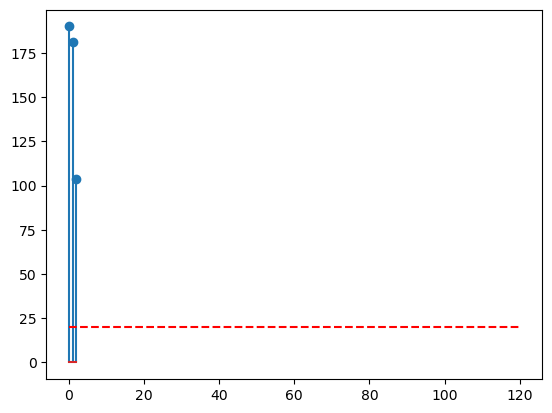

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.stem(cluster_size)
ax1.hlines(y=20, linestyles='dashed', xmin=0, xmax=120, colors='red')

In [48]:
set(filtered_clusters.values())

{0, 1, 2}

In [49]:
filtered_kirc_gsea = kirc_gsea_scaled.drop(outliers, axis=0)
filtered_kirc_gsea.shape

(475, 17)

In [50]:
labels = []
filtered_samples = list(filtered_kirc_gsea.index)
for each_sample in filtered_samples:
    labels.append(filtered_clusters[each_sample])

In [51]:
metrics.silhouette_score(filtered_kirc_gsea, labels, metric='cosine')

0.32579973746561947

In [52]:
metrics.calinski_harabasz_score(filtered_kirc_gsea, labels)

116.57897112633302

### Searching optimizied K

In [40]:
cutoffs = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
sample_num = []
coverage = []
cluster_num = []
silhouette = []
calinski = []

for cutoff in cutoffs:

    # create network
    G = nx.Graph()

    G.add_nodes_from(samples)

    for i in range(len(samples)-1):
        for j in range(i+1, len(samples)):
            if corM[i, j] >= cutoff:
                G.add_edge(samples[i], samples[j])

    # clustering
    clusters = nx.community.louvain_communities(G, seed=100, weight=None)

    # filter small modules out
    filtered_clusters = {}
    outliers = []
    cluster_size = []

    cluster_idx = 0
    for i in range(len(clusters)):
        cluster_size.append(len(clusters[i]))

        if len(clusters[i]) >= 20:
            for each_sample in clusters[i]:
                filtered_clusters[each_sample] = cluster_idx
            
            cluster_idx += 1

        else:
            for each_sample in clusters[i]:
                outliers.append(each_sample)
    
    # compute clustering score
    filtered_kirc_gsea = kirc_gsea_scaled.drop(outliers, axis=0)

    labels = []
    filtered_samples = list(filtered_kirc_gsea.index)
    for each_sample in filtered_samples:
        labels.append(filtered_clusters[each_sample])

    sc = metrics.silhouette_score(filtered_kirc_gsea, labels, metric='cosine')
    chc = metrics.calinski_harabasz_score(filtered_kirc_gsea, labels)

    sample_num.append(len(filtered_samples))
    coverage.append(float(len(filtered_samples))/len(samples)*100)
    cluster_num.append(len(set(labels)))
    silhouette.append(sc)
    calinski.append(chc)

clustering_stats = pd.DataFrame({'PCC_Cutoff': cutoffs,
                                 'Number_of_Sample':sample_num,
                                 'Coverage_of_Sample':coverage,
                                 'Number_of_Cluster': cluster_num,
                                 'Silhouette_Score': silhouette,
                                 'Calinski_Harabasz_Score':calinski})

clustering_stats


,PCC_Cutoff,Number_of_Sample,Coverage_of_Sample,Number_of_Cluster,Silhouette_Score,Calinski_Harabasz_Score
0,0.30,475,100.000000,3,0.316691,113.186485
1,0.35,475,100.000000,3,0.322840,115.433078
2,0.40,475,100.000000,3,0.325800,116.578971
3,0.45,475,100.000000,3,0.323249,115.310315
4,0.50,475,100.000000,4,0.224805,88.301593
5,0.55,472,99.368421,4,0.245488,90.630559
6,0.60,473,99.578947,4,0.226544,89.751068
7,0.65,462,97.263158,5,0.258974,108.232493
8,0.70,442,93.052632,5,0.270422,105.560380
9,0.75,416,87.578947,7,0.261324,93.017750


In [42]:
clustering_stats.to_csv('clustering_stats.csv', index=False)